# Explore and preprocess EURUSD data

First, import all necessary libraries and the data file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Pretty display
%matplotlib inline

# Import data
data = pd.read_csv('data/EURUSD_M5_438K.csv')

In [2]:
# Lets transform the time column into a datetime "type"
from datetime import datetime
data['time'] = pd.to_datetime(data['time'], format='%Y_%m_%d_%H_%M_%S')

Let's see some random points in our data

In [3]:
data.sample(5)

,time,close,open,high,low,sebas_stoch1,sebas_stoch2,negrita1,negrita2,ladrillo
368100,2016-12-20 14:15:00,1.03718,1.03793,1.03793,1.03697,28.034682,28.291670,-0.000195,-0.000156,-0.000038
216545,2014-12-05 02:05:00,1.23843,1.23841,1.23852,1.23837,42.637644,51.373253,0.000148,0.000162,-0.000014
226158,2015-01-26 13:55:00,1.12239,1.12282,1.12309,1.12239,23.354688,33.015086,-0.000223,-0.000108,-0.000115
149868,2014-01-13 08:55:00,1.36749,1.36718,1.36749,1.36715,72.695652,70.086957,-0.000052,-0.000099,0.000046
321401,2016-05-06 07:15:00,1.14061,1.14088,1.14088,1.14061,48.705882,41.372305,0.000066,0.000029,0.000036


Everything looks normal. Now let's view some statistics of our data using the handy `'descibe'` function of pandas

In [4]:
data.describe()

,close,open,high,low,sebas_stoch1,sebas_stoch2,negrita1,negrita2,ladrillo
count,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,4.386400e+05,4.386400e+05,4.386400e+05
mean,11.677773,11.433027,12.063090,12.166126,134.182677,49.698128,-1.765522e-06,-1.763238e-06,-2.284511e-09
std,112.502253,111.153666,114.504286,115.457485,2200.830566,20.736170,4.321818e-04,4.258041e-04,1.043231e-04
min,1.034490,1.034490,1.035800,1.032490,1.630600,2.267673,-7.438083e-03,-7.053718e-03,-2.186876e-03
25%,1.115130,1.115130,1.115360,1.114910,32.248521,32.615648,-1.701806e-04,-1.677128e-04,-4.389836e-05
50%,1.224350,1.224290,1.224910,1.223970,49.721857,49.668944,-6.156445e-07,-6.989657e-07,1.129529e-07
75%,1.317343,1.317300,1.317640,1.317120,67.261905,66.760663,1.678373e-04,1.654748e-04,4.396166e-05
max,1394.000000,1395.000000,1395.000000,1393.000000,90625.000000,97.330773,7.210471e-03,6.871573e-03,2.316783e-03


There seems to be some strange outliers in the first 5 columns, let's see the data in a plot.

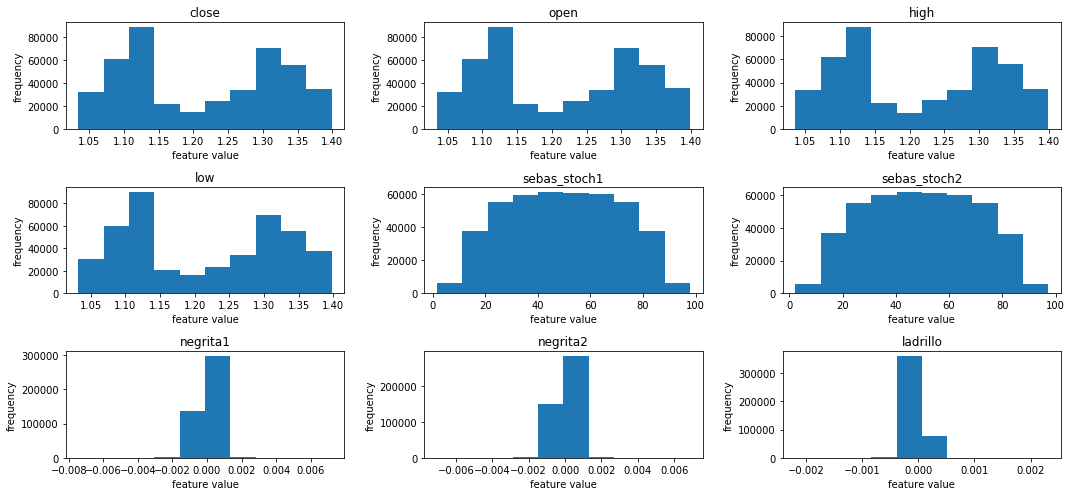

In [12]:
def plot_data(data):
    fig = plt.figure(figsize=(15,7))
    for i in range(1,10):
        ax = fig.add_subplot(330 + i)
        ax.hist(data[data.columns[i]], label='a')
        ax.title.set_text(data.columns[i])
        ax.set_xlabel('feature value')
        ax.set_ylabel('frequency')
        
    plt.tight_layout()
    plt.show()

plot_data(data)

Clearly the outliers are distorting the first plots. Let's take a look at the data by ordering the dataframe

In [13]:
data.sort_values('close', ascending=False)[:10]

,time,close,open,high,low,sebas_stoch1,sebas_stoch2,negrita1,negrita2,ladrillo
173570,2014-05-08 14:35:00,1.39877,1.39750,1.39927,1.39705,67.658276,61.928639,0.000700,0.000345,0.000355
173572,2014-05-08 14:45:00,1.39764,1.39763,1.39932,1.39688,72.199814,70.238085,0.000882,0.000549,0.000333
173571,2014-05-08 14:40:00,1.39763,1.39876,1.39902,1.39743,70.856164,66.309174,0.000807,0.000442,0.000365
173569,2014-05-08 14:30:00,1.39752,1.39456,1.39879,1.39357,60.413081,59.846144,0.000437,0.000256,0.000181
162175,2014-03-13 10:25:00,1.39643,1.39563,1.39666,1.39551,78.169791,73.964359,0.000419,0.000330,0.000089
162181,2014-03-13 10:55:00,1.39629,1.39603,1.39630,1.39574,61.175617,62.504059,0.000410,0.000398,0.000012
162180,2014-03-13 10:50:00,1.39603,1.39562,1.39603,1.39532,62.084592,63.567464,0.000380,0.000399,-0.000019
162176,2014-03-13 10:30:00,1.39590,1.39644,1.39648,1.39590,74.167508,75.717674,0.000432,0.000350,0.000082
162177,2014-03-13 10:35:00,1.39573,1.39590,1.39613,1.39570,69.488372,73.941890,0.000423,0.000373,0.000049
162203,2014-03-13 12:45:00,1.39571,1.39524,1.39582,1.39523,53.235294,50.537463,0.000037,0.000001,0.000036


So, the problem with our data seems to be with numbers that had too few decimals and for some reason they were treated as integers instead of decimal float values. We'll change these values dividing them by 1000.

In [14]:
# we will modify only the affected columns' values
for j in range(1,6):
    # to speed things up we first sort the column, so we don't compare to all the rows
    data_sorted = data.sort_values(data.columns[j], ascending=False, inplace=False)
    
    for i, row in data_sorted.iterrows():
        if row[j] > 1000:
            data.iloc[i, j] /= 1000
        else:
            # break loop for this column
            break
data.describe()

,close,open,high,low,sebas_stoch1,sebas_stoch2,negrita1,negrita2,ladrillo
count,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,4.386400e+05,4.386400e+05,4.386400e+05
mean,1.214765,1.214765,1.214996,1.214536,49.698135,49.698128,-1.765522e-06,-1.763238e-06,-2.284511e-09
std,0.108256,0.108256,0.108240,0.108271,21.160887,20.736170,4.321818e-04,4.258041e-04,1.043231e-04
min,1.034490,1.034490,1.035800,1.032490,1.630600,2.267673,-7.438083e-03,-7.053718e-03,-2.186876e-03
25%,1.114840,1.114840,1.115048,1.114660,32.215947,32.615648,-1.701806e-04,-1.677128e-04,-4.389836e-05
50%,1.218005,1.218010,1.218210,1.217825,49.659864,49.668944,-6.156445e-07,-6.989657e-07,1.129529e-07
75%,1.315770,1.315770,1.316020,1.315520,67.167382,66.760663,1.678373e-04,1.654748e-04,4.396166e-05
max,1.398770,1.398760,1.399320,1.397430,97.812391,97.330773,7.210471e-03,6.871573e-03,2.316783e-03


Our data looks alright, we can plot again to verify. But just looking at the standard deviation we can see that the changes made a big impact

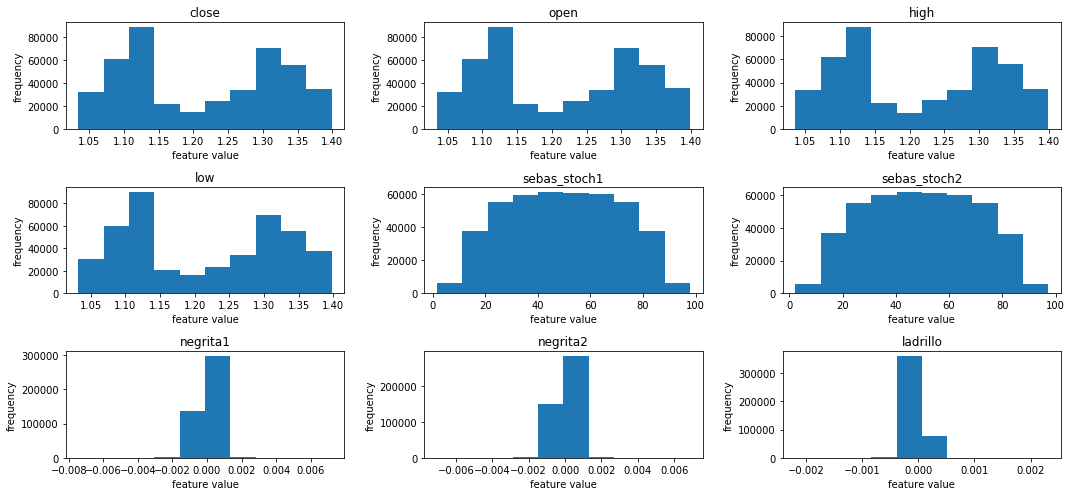

In [15]:
plot_data(data)

Indeed, much better! Now we normalize the data between 0 and 1, but not the prices!

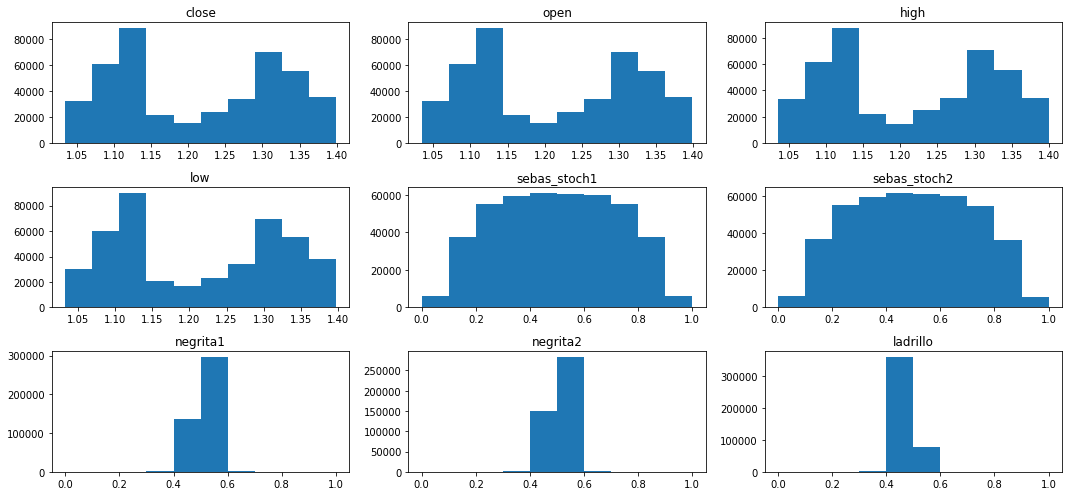

In [9]:
def normalize(df):
    columns = ['sebas_stoch1', 'sebas_stoch2', 'negrita1', 'negrita2', 'ladrillo']
    result = df.copy()
    for feature_name in columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

data = normalize(data)
plot_data(data)

In [10]:
data.describe()

,close,open,high,low,sebas_stoch1,sebas_stoch2,negrita1,negrita2,ladrillo
count,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000,438640.000000
mean,1.214765,1.214765,1.214996,1.214536,0.499757,0.498937,0.507649,0.506413,0.485577
std,0.108256,0.108256,0.108240,0.108271,0.220009,0.218131,0.029503,0.030578,0.023164
min,1.034490,1.034490,1.035800,1.032490,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.114840,1.114840,1.115048,1.114660,0.317995,0.319240,0.496152,0.494496,0.475830
50%,1.218005,1.218010,1.218210,1.217825,0.499359,0.498630,0.507727,0.506490,0.485603
75%,1.315770,1.315770,1.316020,1.315520,0.681385,0.678423,0.519227,0.518423,0.495339
max,1.398770,1.398760,1.399320,1.397430,1.000000,1.000000,1.000000,1.000000,1.000000


Finally, let's plot the `close` variable to see if it matches this image:

![EURUSD since 2012](data/EURUSD_2012-2017.png)
Image source: [macrotrends](http://www.macrotrends.net/2548/euro-dollar-exchange-rate-historical-chart)

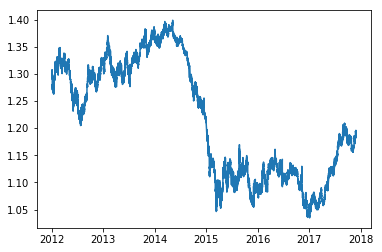

In [11]:
plt.plot(data['time'], data['close'])
plt.show()


Perfect. Now we output the data to a new file

In [12]:
data.to_csv('data/EURUSD_M5_438K_Preprocessed.csv', index=False)